In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#importing data file and replacing values marked by '?' as na values
data=pd.read_csv('auto-mpg.csv',na_values='?')

In [22]:
data.head()
#so dataset contains information about the mileage per gallon performance of various cars and my aim is to develop a model so 
#that we can predict miles per gallon(mpg) for a new car more accurately. 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [23]:
#splitting the car name variable so that we can only access the brand of the car.
data['car name']=data['car name'].apply(lambda x:x.split()[0])

In [24]:
#checking the information about the data i.e. what is the type of the variable,presence of null values.
data.info()
#obviously there are some null values and we have to replace these null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 26.5+ KB


In [25]:
#data.head()

In [26]:
#checking the model year of different cars
data['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [27]:
#calculating the median value where horsepower is not null
median=data.horsepower[pd.isnull(data['horsepower'])==False].median()

In [28]:
#replacing the null values in horsepower variable by the median value of non null values in horsepower variable. 
data.horsepower.fillna(median,inplace=True)

In [29]:
data.info()
#now we can see that there is no missing observation.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 26.5+ KB


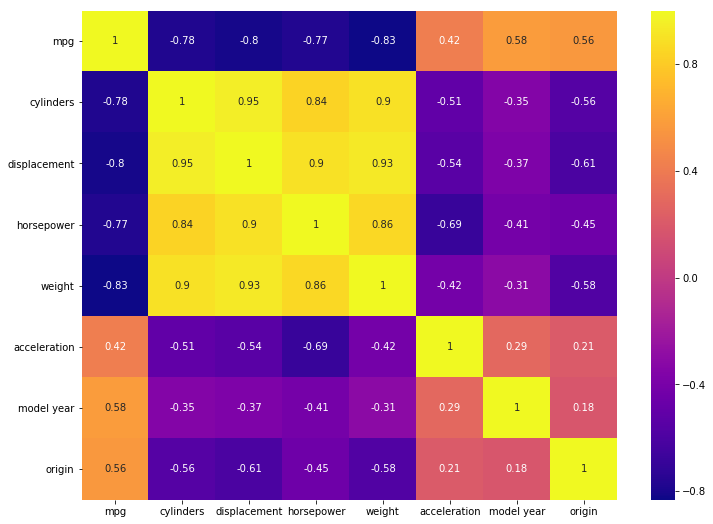

In [30]:
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(),annot=True,cmap='plasma')
#we can see that most of the variables are correlated

In [31]:
#data.info()

In [32]:
#data.head()
#converting the model year variable as string type so that we can convert it in categorical type.
data['model year']=data['model year'].astype(str)

In [33]:
data['model year'].unique()

array(['70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
       '81', '82'], dtype=object)

In [34]:
#converting the model year variable in categorical type
replacement2={
    '70':0,
    '71':1,
    '72':2,
    '73':3,
    '74':4,
    '75':5,
    '76':6,
    '77':7,
    '78':8,
    '79':9,
    '80':10,
    '81':11,
    '82':12
    }
data['model year']=data['model year'].apply(lambda x:replacement2.get(x))

In [35]:
#droping the car name variable as there are too many categories in this variable and this may make our model worst.
data.drop('car name',axis=1,inplace=True)

In [36]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,0,1
1,15.0,8,350.0,165.0,3693,11.5,0,1
2,18.0,8,318.0,150.0,3436,11.0,0,1
3,16.0,8,304.0,150.0,3433,12.0,0,1
4,17.0,8,302.0,140.0,3449,10.5,0,1


In [37]:
#importing StandardScaler so that we can bring all the variables on same unit scale.
from sklearn.preprocessing import StandardScaler

In [38]:
#storing target variable(mpg) in one dataframe and features in another dataframe.
X1=data.drop('mpg',axis=1)
X=X1.values
y1=data['mpg']
y=y1.values

In [39]:
#bringing features and target variable on the same unit scale.
X=StandardScaler().fit_transform(X)
y=StandardScaler().fit_transform(y.reshape(-1,1))

In [40]:
#importing different models and RepeatedKFold for cross validation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RepeatedKFold 


In [41]:
models=[]
models.append(('LinR',LinearRegression()))
models.append(('RFR',RandomForestRegressor(n_estimators=500)))
models.append(('SVR',SVR()))

In [42]:
#splitting DataFrame in train and test indices using RepeatedKFold which spits the Dataframe in 5 parts and 
#repeated cross validation 10 times.
kf = RepeatedKFold(n_splits=5,n_repeats=10,random_state=0) 

for train_index, test_index in kf.split(X1):
        X_train, X_test = X[train_index], X[test_index] 
        y_train, y_test = y[train_index], y[test_index]



In [43]:
X=pd.DataFrame(X,columns=X1.columns)

In [45]:
#importing statsmodels.api as sm to perform statistical regression.
import statsmodels.api as sm

In [46]:
#fitting the regression on the target and explanatory variables.
res1=sm.OLS(y,X).fit()

In [49]:
print(res1.summary())
#here condition no. is less than 30 which suggests that there is not multicollinearity in data. and R squared value is 0.82 
#which suggests that model is quite good.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.1
Date:                Wed, 15 Aug 2018   Prob (F-statistic):          9.14e-142
Time:                        22:36:43   Log-Likelihood:                -222.44
No. Observations:                 398   AIC:                             458.9
Df Residuals:                     391   BIC:                             486.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.0915      0.070     -1.307   

In [51]:
lm=LinearRegression()

In [52]:
#fitting linear regression on training set.
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
#predicting the mpg values on X_test
y_pred=lm.predict(X_test)


In [54]:
from sklearn.metrics import r2_score

In [56]:
print(r2_score(y_test,y_pred))
#here R squared value is 0.84 which is pretty good.

0.8342693547794073


In [57]:
rfc=RandomForestRegressor(n_estimators=500)

In [58]:
#fitting RandomForest regressor on train set.
rfc.fit(X_train,y_train.reshape(319,))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
#presdicting the mpg values using RandomForest regressor
y_pred2=rfc.predict(X_test)

In [60]:
print(r2_score(y_test,y_pred2))
#here is an increase in accuracy which is 0.88

0.8815568411885019


In [63]:
svr=SVR()

In [64]:
#fitting support vector regressor on train set
svr.fit(X_train,y_train.reshape(319,))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [65]:
#predicting mpg values on X_test
y_pred3=svr.predict(X_test)

In [66]:
print(r2_score(y_test,y_pred3))

0.8757845036882131
